## Imported Packages and Data

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from scipy import stats
import math
from scipy.stats import norm

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/learn-co-students/bsc-phase-two-project/main/data/kc_house_data.csv')

## Prepped Data

#### Got Rid of Null values for Waterfront

In [3]:
df['waterfront'] = df['waterfront'].replace(np.NaN,0)

#### One Hot Encoded Zip Codes

In [4]:
ohe=OneHotEncoder(sparse=False)
ohe.fit(df[['zipcode']])
dfohe = pd.DataFrame(ohe.transform(df[['zipcode']]), columns = ohe.get_feature_names())
dfohe.columns = dfohe.columns.str.replace('x0','zip')
dfohe

,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Found Correlation between price and Variables

In [7]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

#### Continued Formatting Columns

In [8]:
df['sqft_basement']=df['sqft_basement'].replace(' ','')


In [9]:
df['basement']=df['sqft_living']-df['sqft_above']

In [10]:
df['basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: basement, Length: 306, dtype: int64

In [11]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
basement         0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement'],
      dtype='object')

In [13]:
slimdf=df.drop(['sqft_lot','sqft_basement','zipcode', 'long','sqft_lot15', 'basement'], axis=1)

In [14]:
slimdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,sqft_living15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.494096,0.006760,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,47.560093,1986.620318
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,0.539683,0.081944,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,0.138552,685.230472
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,47.155900,399.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,47.471100,1490.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,47.571800,1840.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,47.678000,2360.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,47.777600,6210.000000


#### Looked at Correlation for Grades

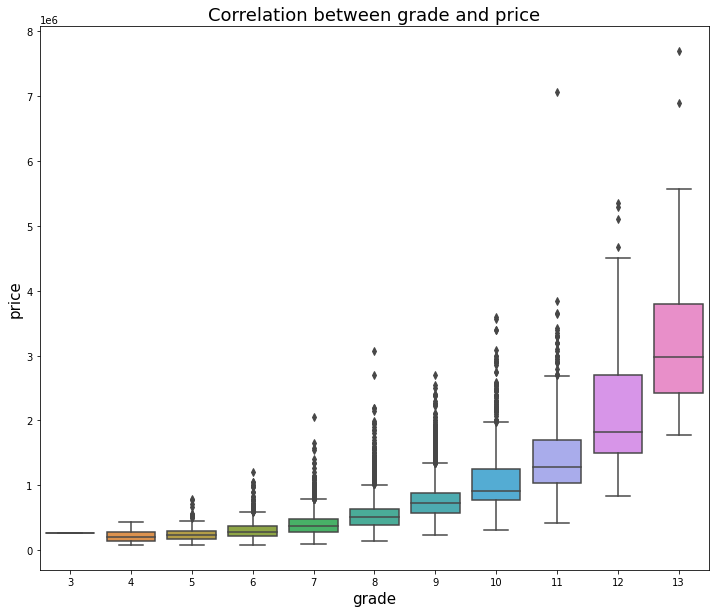

In [15]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x=slimdf['grade'], y=slimdf['price'], ax=ax)
ax.set_title('Correlation between grade and price', fontsize=18)
ax.set_ylabel('price', fontsize=15)
ax.set_xlabel('grade', fontsize=15);

In [16]:
slimdf['grade'].value_counts(ascending=False)

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [17]:
slimdf['house_to_hood']=slimdf['sqft_living']/slimdf['sqft_living15']

#### Created a natural log price column

In [18]:
slimdf['price_log']=np.log(slimdf['price'])
slimdf

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,sqft_living15,house_to_hood,price_log
0,7129300520,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,0.0,3,7,1180,1955,0.0,47.5112,1340,0.880597,12.309982
1,6414100192,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,0.0,3,7,2170,1951,1991.0,47.7210,1690,1.520710,13.195614
2,5631500400,2/25/2015,180000.0,2,1.00,770,1.0,0.0,0.0,3,6,770,1933,NaN,47.7379,2720,0.283088,12.100712
3,2487200875,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,0.0,5,7,1050,1965,0.0,47.5208,1360,1.441176,13.311329
4,1954400510,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,0.0,3,8,1680,1987,0.0,47.6168,1800,0.933333,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,3.0,0.0,0.0,3,8,1530,2009,0.0,47.6993,1530,1.000000,12.793859
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,2.0,0.0,0.0,3,8,2310,2014,0.0,47.5107,1830,1.262295,12.899220
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,2.0,0.0,0.0,3,7,1020,2009,0.0,47.5944,1020,1.000000,12.904459
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2.0,0.0,0.0,3,8,1600,2004,0.0,47.5345,1410,1.134752,12.899220


#### Looked at Correlation between sqft_living and price_log

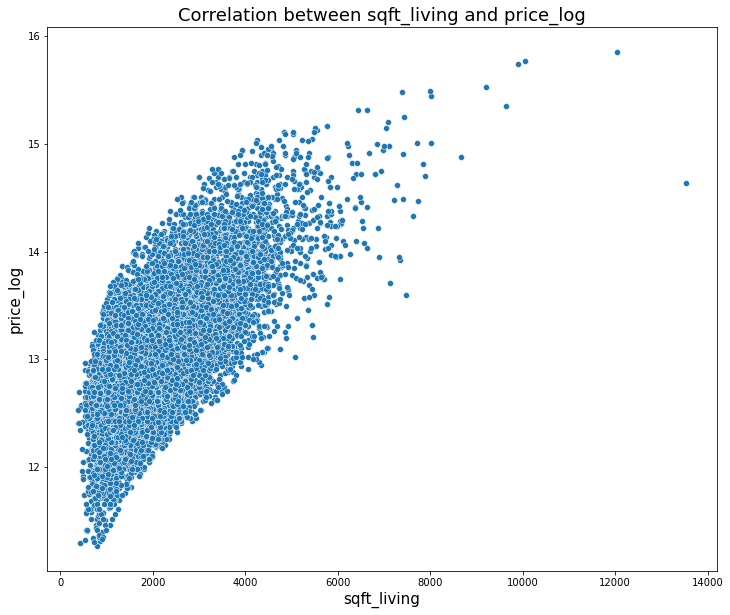

In [19]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=slimdf['sqft_living'], y=slimdf['price_log'], ax=ax)
ax.set_title('Correlation between sqft_living and price_log', fontsize=18)
ax.set_ylabel('price_log', fontsize=15)
ax.set_xlabel('sqft_living', fontsize=15);

#### Looked at Correlation between sqft_living_log and price_log

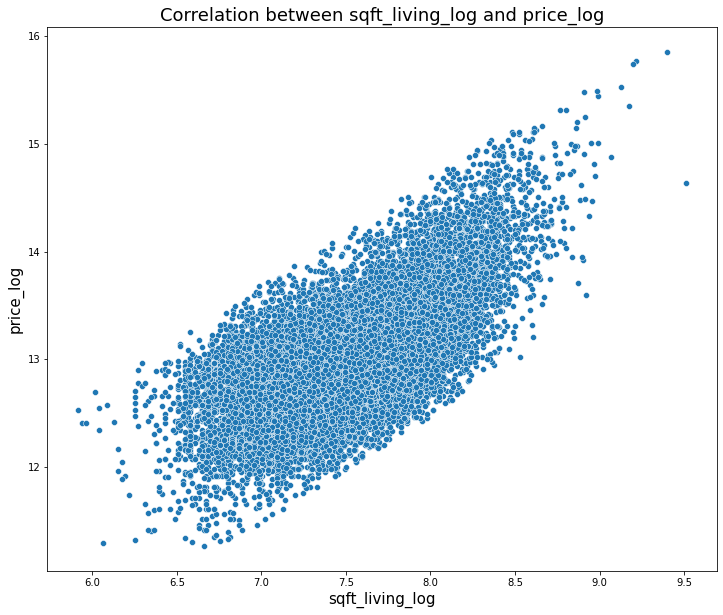

In [20]:
slimdf['sqft_living_log']=np.log(slimdf['sqft_living'])
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=slimdf['sqft_living_log'], y=slimdf['price_log'], ax=ax)
ax.set_title('Correlation between sqft_living_log and price_log', fontsize=18)
ax.set_ylabel('price_log', fontsize=15)
ax.set_xlabel('sqft_living_log', fontsize=15);

#### Plotted a map of the housing data using latitude and longitude

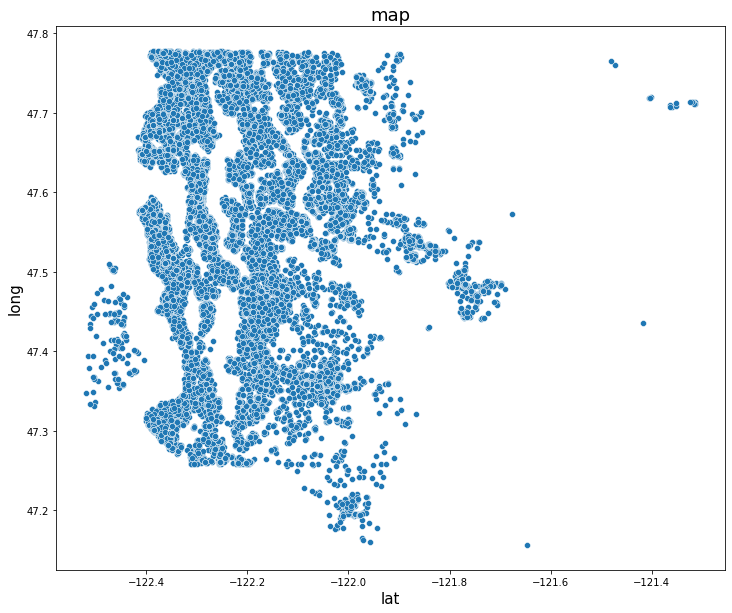

In [21]:

fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['long'], y=df['lat'], ax=ax)
ax.set_title('map', fontsize=18)
ax.set_ylabel('long', fontsize=15)
ax.set_xlabel('lat', fontsize=15);

In [22]:
slimdf.drop('grade', axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,yr_renovated,lat,sqft_living15,house_to_hood,price_log,sqft_living_log
0,7129300520,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,0.0,3,1180,1955,0.0,47.5112,1340,0.880597,12.309982,7.073270
1,6414100192,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,0.0,3,2170,1951,1991.0,47.7210,1690,1.520710,13.195614,7.851661
2,5631500400,2/25/2015,180000.0,2,1.00,770,1.0,0.0,0.0,3,770,1933,NaN,47.7379,2720,0.283088,12.100712,6.646391
3,2487200875,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,0.0,5,1050,1965,0.0,47.5208,1360,1.441176,13.311329,7.580700
4,1954400510,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,0.0,3,1680,1987,0.0,47.6168,1800,0.933333,13.142166,7.426549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,3.0,0.0,0.0,3,1530,2009,0.0,47.6993,1530,1.000000,12.793859,7.333023
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,2.0,0.0,0.0,3,2310,2014,0.0,47.5107,1830,1.262295,12.899220,7.745003
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,2.0,0.0,0.0,3,1020,2009,0.0,47.5944,1020,1.000000,12.904459,6.927558
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2.0,0.0,0.0,3,1600,2004,0.0,47.5345,1410,1.134752,12.899220,7.377759


In [23]:
slimdf_filt=slimdf[np.abs(stats.zscore(slimdf['price'])) < 3]

#### Looked the Correlation between grade and price_log

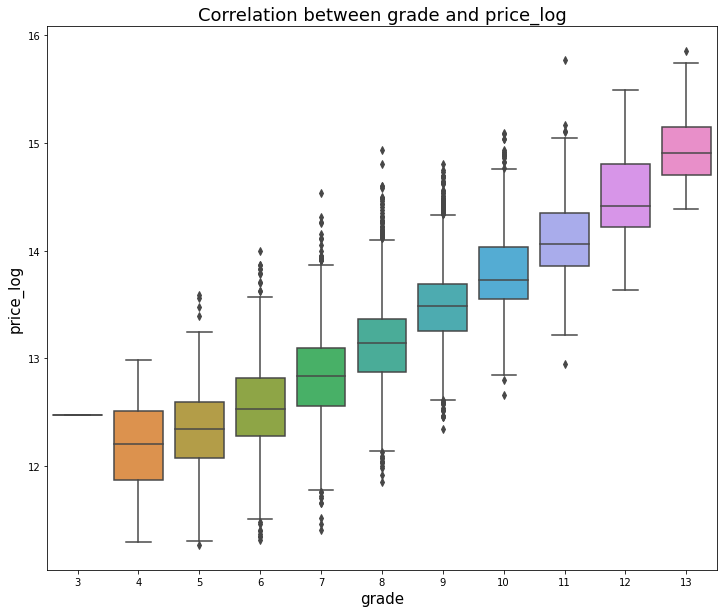

In [24]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x=slimdf['grade'], y=slimdf['price_log'], ax=ax)
ax.set_title('Correlation between grade and price_log', fontsize=18)
ax.set_ylabel('price_log', fontsize=15)
ax.set_xlabel('grade', fontsize=15);

#### Created an Age of House variable

In [25]:
slimdf['year_sold']=pd.DatetimeIndex(slimdf['date']).year

In [26]:
slimdf['age_of_house']=slimdf['year_sold']-slimdf['yr_built']

In [27]:
slimdf=slimdf.drop('yr_renovated',axis=1)

In [28]:
slimdf['bath-bed']=slimdf['bathrooms']-slimdf['bedrooms']

#### Created a function to filter grade into fewer categories then one hot encoded it into columns

In [29]:
def bin_grade(x):
    if x <= 5:
        return 1
    elif x <= 7:
        return 2
    elif x <= 9: 
        return 3
    elif x <= 11:
        return 4
    else:
        return 5
slimdf.grade.apply(bin_grade)

0        2
1        2
2        2
3        2
4        3
        ..
21592    3
21593    3
21594    2
21595    3
21596    2
Name: grade, Length: 21597, dtype: int64

In [30]:
slimdf['grade_bins']=slimdf.grade.apply(bin_grade)
slimdf

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,lat,sqft_living15,house_to_hood,price_log,sqft_living_log,year_sold,age_of_house,bath-bed,grade_bins
0,7129300520,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,0.0,3,...,1955,47.5112,1340,0.880597,12.309982,7.073270,2014,59,-2.00,2
1,6414100192,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,0.0,3,...,1951,47.7210,1690,1.520710,13.195614,7.851661,2014,63,-0.75,2
2,5631500400,2/25/2015,180000.0,2,1.00,770,1.0,0.0,0.0,3,...,1933,47.7379,2720,0.283088,12.100712,6.646391,2015,82,-1.00,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,0.0,5,...,1965,47.5208,1360,1.441176,13.311329,7.580700,2014,49,-1.00,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,0.0,3,...,1987,47.6168,1800,0.933333,13.142166,7.426549,2015,28,-1.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,3.0,0.0,0.0,3,...,2009,47.6993,1530,1.000000,12.793859,7.333023,2014,5,-0.50,3
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,2.0,0.0,0.0,3,...,2014,47.5107,1830,1.262295,12.899220,7.745003,2015,1,-1.50,3
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,2.0,0.0,0.0,3,...,2009,47.5944,1020,1.000000,12.904459,6.927558,2014,5,-1.25,2
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2.0,0.0,0.0,3,...,2004,47.5345,1410,1.134752,12.899220,7.377759,2015,11,-0.50,3


In [31]:
ohe=OneHotEncoder(sparse=False)
ohe.fit(slimdf[['grade_bins']])
slimdfohe = pd.DataFrame(ohe.transform(slimdf[['grade_bins']]), columns = ohe.get_feature_names())
slimdfohe

,x0_1,x0_2,x0_3,x0_4,x0_5
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
21592,0.0,0.0,1.0,0.0,0.0
21593,0.0,0.0,1.0,0.0,0.0
21594,0.0,1.0,0.0,0.0,0.0
21595,0.0,0.0,1.0,0.0,0.0


In [32]:
slimdfohe.columns = slimdfohe.columns.str.replace('x0','grade')
#Fixed the column names

In [33]:
slimdf = pd.concat([slimdf, slimdfohe], axis=1)

In [34]:
slimdf.drop('grade_bins', axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,price_log,sqft_living_log,year_sold,age_of_house,bath-bed,grade_1,grade_2,grade_3,grade_4,grade_5
0,7129300520,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,0.0,3,...,12.309982,7.073270,2014,59,-2.00,0.0,1.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,0.0,3,...,13.195614,7.851661,2014,63,-0.75,0.0,1.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,1.0,0.0,0.0,3,...,12.100712,6.646391,2015,82,-1.00,0.0,1.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,0.0,5,...,13.311329,7.580700,2014,49,-1.00,0.0,1.0,0.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,0.0,3,...,13.142166,7.426549,2015,28,-1.00,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,3.0,0.0,0.0,3,...,12.793859,7.333023,2014,5,-0.50,0.0,0.0,1.0,0.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,2.0,0.0,0.0,3,...,12.899220,7.745003,2015,1,-1.50,0.0,0.0,1.0,0.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,2.0,0.0,0.0,3,...,12.904459,6.927558,2014,5,-1.25,0.0,1.0,0.0,0.0,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2.0,0.0,0.0,3,...,12.899220,7.377759,2015,11,-0.50,0.0,0.0,1.0,0.0,0.0


#### Created our original model dataframe

In [35]:
originalmodeldf=slimdf.drop(['id', 'date','view', 'grade','yr_built','house_to_hood','sqft_living_log','year_sold','bath-bed', 'grade_bins'], axis=1)

In [73]:
originalmodeldf.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'condition', 'sqft_above', 'lat', 'sqft_living15', 'price_log',
       'age_of_house', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5'],
      dtype='object')

#### Added zipcode to our original model dataframe and 2nd model

In [36]:
originalmodeldfzip= pd.concat([originalmodeldf, dfohe], axis=1)
originalmodeldfzip
originalmodeldfzip_drop3stdlog=originalmodeldfzip[np.abs(stats.zscore(originalmodeldfzip['price_log'])) < 3]

#### defined a function to graph the error of our model into price ranges

In [37]:
def plot_errors(y_true, y_preds):
    errors = pd.DataFrame()
    errors['bins'] = pd.qcut(y_true, 10)
    errors['error'] = y_preds - y_true
    errors.groupby('bins').mean().plot(kind='bar', figsize=(15,6))
    plt.xticks(rotation=40);

#### defined a function that runs our linear regression model, graphs our error, and list the model coeffecients

In [38]:
def linregtest(dataframe):
    X = dataframe.drop(['price','price_log'], axis=1)
    y = dataframe['price']
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_score = mean_squared_error(y_train, train_preds)
    test_score = mean_squared_error(y_test, test_preds)
    train_score_RSME = math.sqrt(train_score)
    test_score_RSME =math.sqrt(test_score)
    print('Train score:', train_score)
    print('Test score:', test_score)
    print('RSME train:', math.sqrt(train_score))
    print('RSME test:', math.sqrt(test_score))
    errors = pd.DataFrame()
    errors['bins'] = pd.qcut(y_train, 15)
    errors['error'] = train_preds - y_train
    errors.groupby('bins').mean().plot(kind='bar', figsize=(18,8))
    plt.xticks(rotation=40);
    return list(zip(X.columns, model.coef_))


In [39]:
def linregtestnocoef(dataframe):
    X = dataframe.drop(['price','price_log'], axis=1)
    y = dataframe['price']
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_score = mean_squared_error(y_train, train_preds)
    test_score = mean_squared_error(y_test, test_preds)
    train_score_RSME = math.sqrt(train_score)
    test_score_RSME =math.sqrt(test_score)
    print('Train score:', train_score)
    print('Test score:', test_score)
    print('RSME train:', math.sqrt(train_score))
    print('RSME test:', math.sqrt(test_score))
    errors = pd.DataFrame()
    errors['bins'] = pd.qcut(y_train, 25)
    errors['error'] = train_preds - y_train
    errors.groupby('bins').mean().plot(kind='bar', figsize=(18,8),)
    plt.xticks(rotation=40);
#This model does't print coefficients

#### Modeled our first dataframe

Train score: 40357866119.221176
Test score: 43447448756.29291
RSME train: 200892.67313473922
RSME test: 208440.51611021525


[('bedrooms', -28323.813422635965),
 ('bathrooms', 52540.171183196835),
 ('sqft_living', 167.18765233098628),
 ('floors', 38160.83905490961),
 ('waterfront', 755721.5251575499),
 ('condition', 33545.63277074819),
 ('sqft_above', -17.640735097769387),
 ('lat', 573110.3883780176),
 ('sqft_living15', 55.27692754727677),
 ('age_of_house', 2568.1734182452387),
 ('grade_1', -348135.0694119215),
 ('grade_2', -301632.9430494785),
 ('grade_3', -219901.55969595056),
 ('grade_4', 54417.13319468299),
 ('grade_5', 815252.4389626675)]

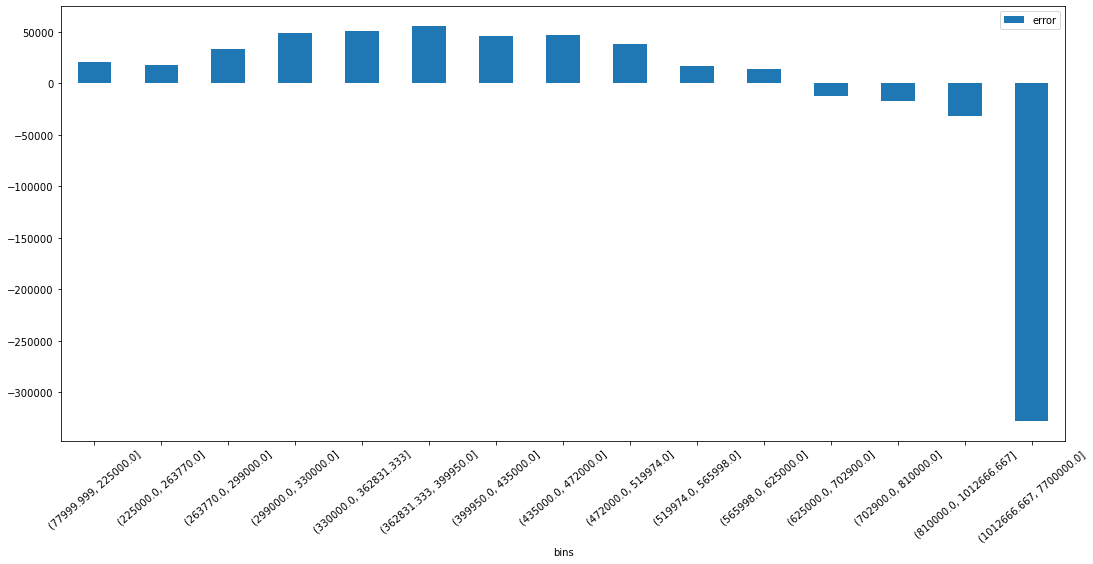

In [40]:
linregtest(originalmodeldf)

#### Created a dataframe that narrows our data by removing any outliers above 3 std in the log_price column

In [41]:
originalmodeldf_drop3stdlog= originalmodeldf[np.abs(stats.zscore(originalmodeldf['price_log'])) < 3]

In [42]:
ziponlypr=originalmodeldf_drop3stdlog['price']

#### Made a heat map of correlations for our originalmodeldf_drop3stdlog data frame

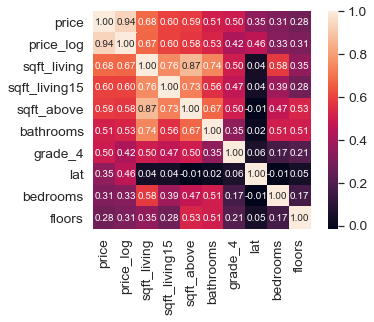

In [43]:
corrmat = originalmodeldf_drop3stdlog.corr()
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(originalmodeldf_drop3stdlog[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Modeled our 2nd dataframe

Train score: 28011234595.12347
Test score: 27474073098.655346
RSME train: 167365.57171390858
RSME test: 165753.048535028


[('bedrooms', -19570.871367698397),
 ('bathrooms', 43452.327162184585),
 ('sqft_living', 129.69740822421835),
 ('floors', 42206.86020970887),
 ('waterfront', 449409.13598292344),
 ('condition', 32267.18981961474),
 ('sqft_above', -9.82551878172718),
 ('lat', 575150.9271596953),
 ('sqft_living15', 65.83436288279549),
 ('age_of_house', 2445.9308511956383),
 ('grade_1', -256350.0612943719),
 ('grade_2', -199540.95991293143),
 ('grade_3', -100416.63227185543),
 ('grade_4', 128630.68887004182),
 ('grade_5', 427676.9646091171)]

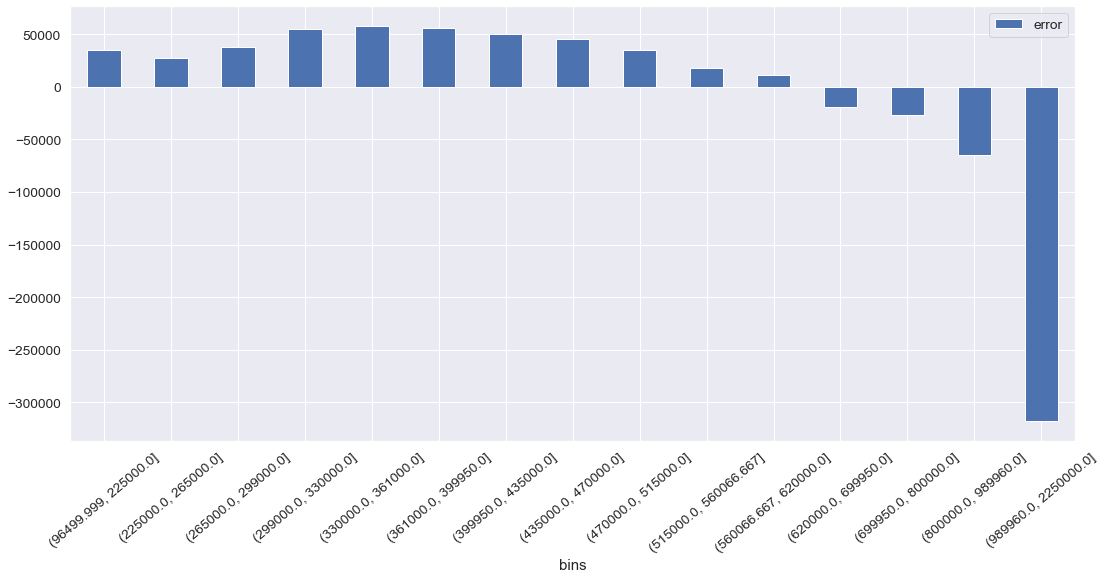

In [44]:
linregtest(originalmodeldf_drop3stdlog)

#### Modeled our 2nd dataframe including zipcodes

Train score: 16077929067.833971
Test score: 15568679999.7262
RSME train: 126798.77392086238
RSME test: 124774.51662790043


[('bedrooms', -13369.97933499495),
 ('bathrooms', 24347.69779941306),
 ('sqft_living', 110.52485747914186),
 ('floors', -17975.92033550028),
 ('waterfront', 523457.68298933277),
 ('condition', 26641.17866490042),
 ('sqft_above', 47.14567720866762),
 ('lat', 98144.51061554777),
 ('sqft_living15', 51.218563724833075),
 ('age_of_house', 626.4040456766379),
 ('grade_1', 87642071869009.11),
 ('grade_2', 87642071865758.6),
 ('grade_3', 87642071914190.45),
 ('grade_4', 87642072085410.78),
 ('grade_5', 87642072365057.73),
 ('zip_98001', -7829357778147.606),
 ('zip_98002', -7829357770615.038),
 ('zip_98003', -7829357786788.488),
 ('zip_98004', -7829357127242.753),
 ('zip_98005', -7829357502423.696),
 ('zip_98006', -7829357542863.717),
 ('zip_98007', -7829357563811.422),
 ('zip_98008', -7829357557572.11),
 ('zip_98010', -7829357716696.41),
 ('zip_98011', -7829357700167.686),
 ('zip_98014', -7829357695461.376),
 ('zip_98019', -7829357734014.94),
 ('zip_98022', -7829357744733.523),
 ('zip_98023', 

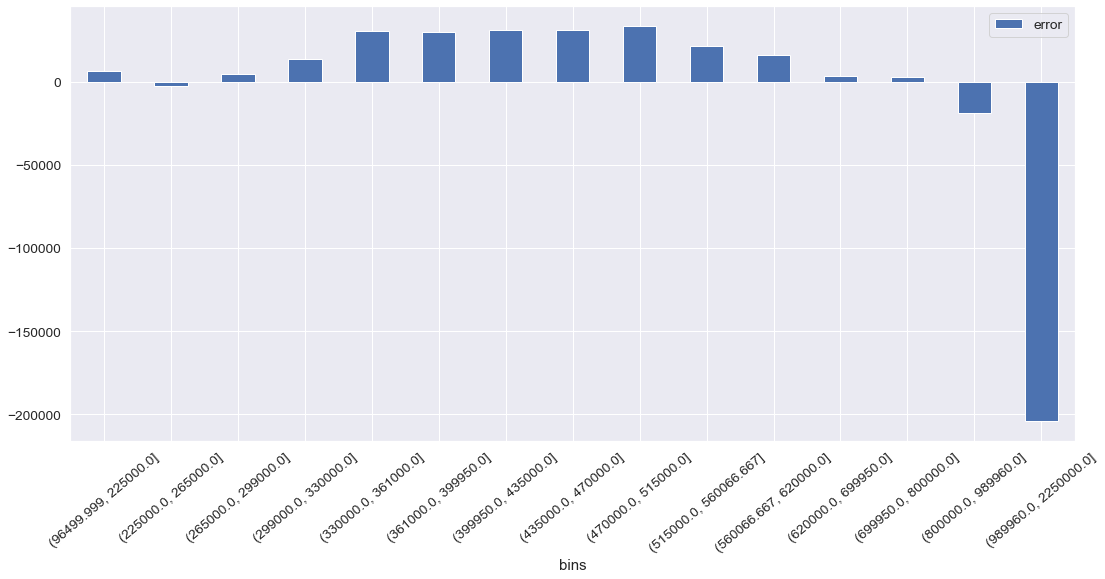

In [45]:
linregtest(originalmodeldfzip_drop3stdlog)

#### Modeled a df with only zip codes as preictors

In [46]:
justzip=originalmodeldfzip_drop3stdlog.drop(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront','condition', 'sqft_above', 'lat', 'sqft_living15','age_of_house', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5'], axis=1)

Train score: 48696692293.426735
Test score: 49551466729.56823
RSME train: 220673.27045527453
RSME test: 222601.58743721535


[('zip_98001', -2.661307117581352e+17),
 ('zip_98002', -2.661307117581842e+17),
 ('zip_98003', -2.6613071175812454e+17),
 ('zip_98004', -2.6613071175722675e+17),
 ('zip_98005', -2.661307117576e+17),
 ('zip_98006', -2.6613071175760787e+17),
 ('zip_98007', -2.6613071175780858e+17),
 ('zip_98008', -2.6613071175782547e+17),
 ('zip_98010', -2.661307117580188e+17),
 ('zip_98011', -2.6613071175791526e+17),
 ('zip_98014', -2.661307117579579e+17),
 ('zip_98019', -2.6613071175799744e+17),
 ('zip_98022', -2.6613071175810704e+17),
 ('zip_98023', -2.6613071175813658e+17),
 ('zip_98024', -2.6613071175782742e+17),
 ('zip_98027', -2.6613071175781434e+17),
 ('zip_98028', -2.6613071175795808e+17),
 ('zip_98029', -2.6613071175780806e+17),
 ('zip_98030', -2.6613071175812698e+17),
 ('zip_98031', -2.6613071175812605e+17),
 ('zip_98032', -2.6613071175816493e+17),
 ('zip_98033', -2.6613071175765795e+17),
 ('zip_98034', -2.6613071175790806e+17),
 ('zip_98038', -2.6613071175805005e+17),
 ('zip_98039', -2.661307

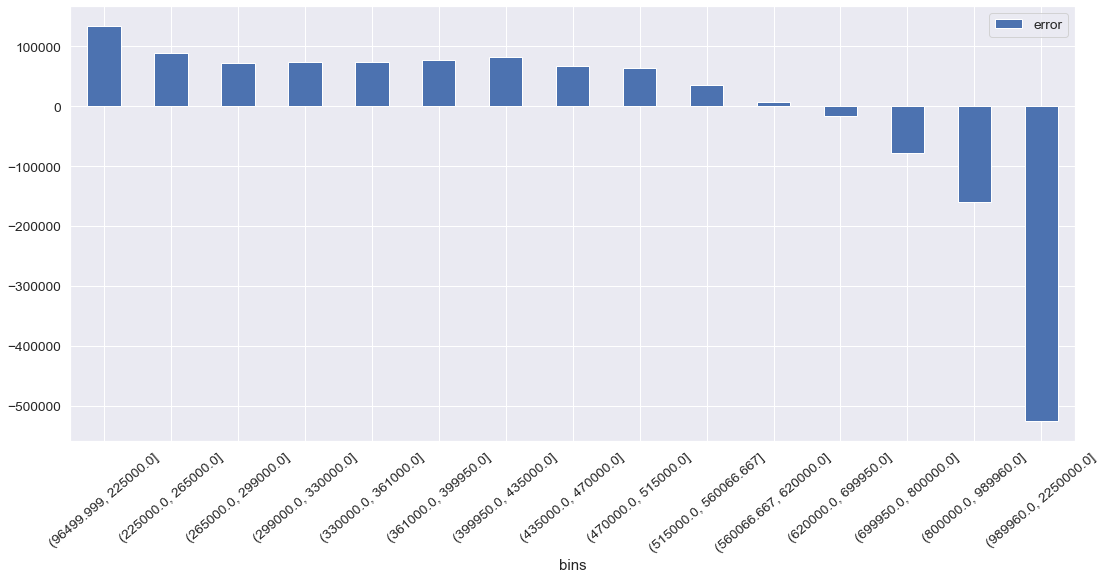

In [47]:
linregtest(justzip)

In [48]:
X = originalmodeldf.drop(['price'], axis=1)
y = originalmodeldf['price']
Xdrop3_train,Xdrop3_test,ydrop3_train,ydrop3_test = train_test_split(X, y, random_state=42)

In [49]:
# Add y_train to X_train as 'target'

# Drop outliers from X_train

# Set y_train back to X_train 'target'

# Drop 'target' from X_train

In [50]:
target=pd.concat([Xdrop3_train, ydrop3_train], axis=1)
target=target[np.abs(stats.zscore(target['price_log'])) < 3]
Xdrop3_train=target.drop(['price'],axis=1)
ydrop3_train=target['price']

Train score: 16077929067.833971
Test score: 15568679999.7262
RSME train: 126798.77392086238
RSME test: 124774.51662790043


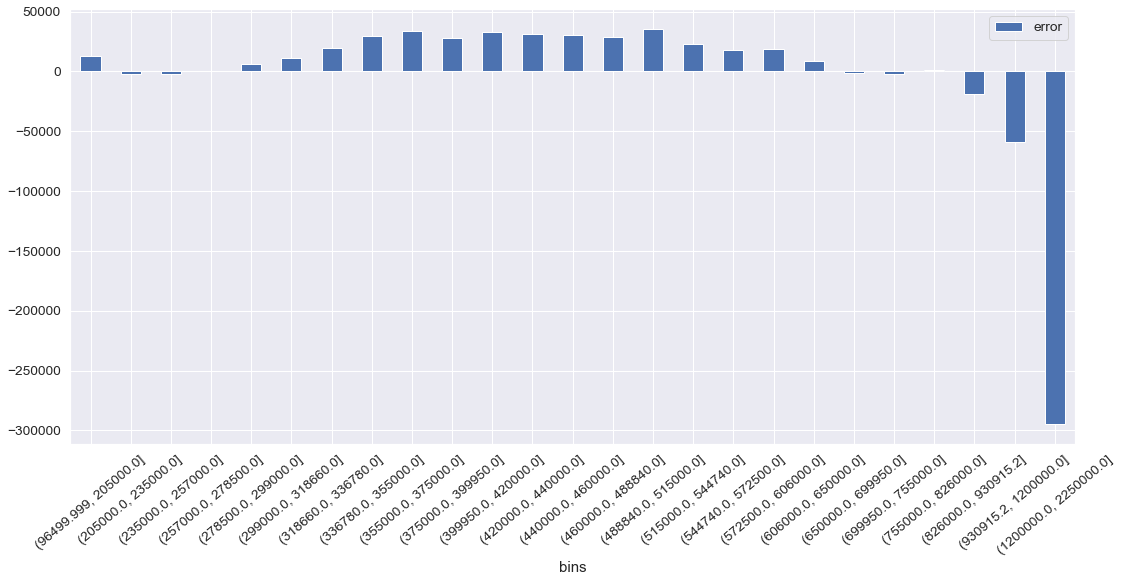

In [51]:
linregtestnocoef(originalmodeldfzip_drop3stdlog)

(array([7.500e+01, 6.330e+02, 4.117e+03, 7.230e+03, 6.222e+03, 2.376e+03,
        7.150e+02, 1.860e+02, 3.600e+01, 7.000e+00]),
 array([11.26446411, 11.72369078, 12.18291746, 12.64214414, 13.10137082,
        13.5605975 , 14.01982417, 14.47905085, 14.93827753, 15.39750421,
        15.85673089]),
 <BarContainer object of 10 artists>)

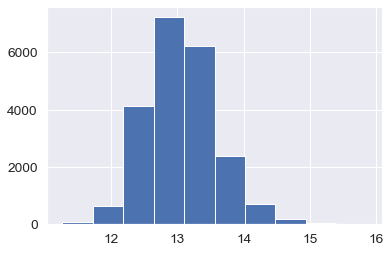

In [52]:
plt.hist(originalmodeldf['price_log'])

In [55]:
X= originalmodeldfzip_drop3stdlog['sqft_living']
Y= originalmodeldfzip_drop3stdlog['price']

In [56]:
def calc_slope(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    return m
calc_slope(X,Y)
def best_fit(xs,ys):
    # use the slope function with intercept formula to return calculate slope and intercept from data points
    m = calc_slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)
    return m, c
m, c = best_fit(X,Y)
def reg_line (m, c, xs):
    return [(m*x)+c for x in xs]
regression_line = reg_line(m,c,X)

#### Made Graphs to look at effects of price vs price logged

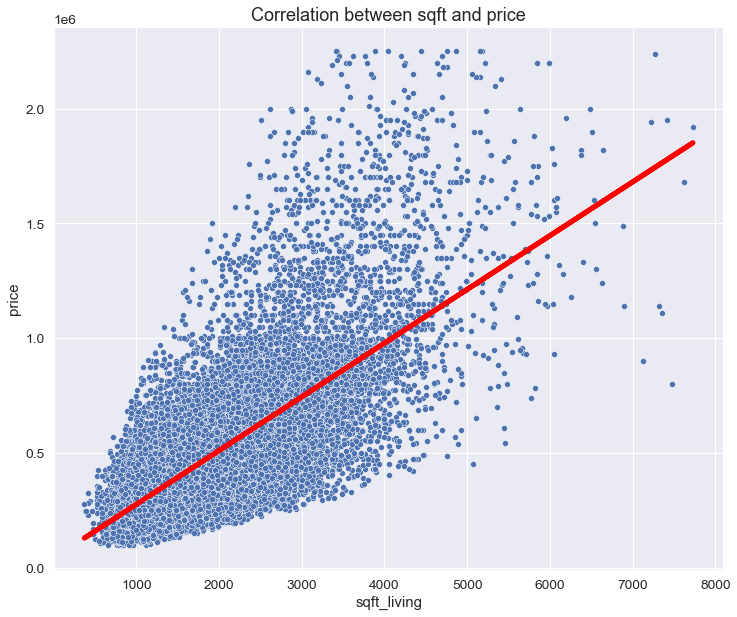

In [58]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=originalmodeldfzip_drop3stdlog['sqft_living'], y=originalmodeldfzip_drop3stdlog['price'], ax=ax)
plt.plot(X, regression_line, lw=5, color='red')
ax.set_title('Correlation between sqft and price', fontsize=18)
ax.set_ylabel('price', fontsize=15)
ax.set_xlabel('sqft_living', fontsize=15);

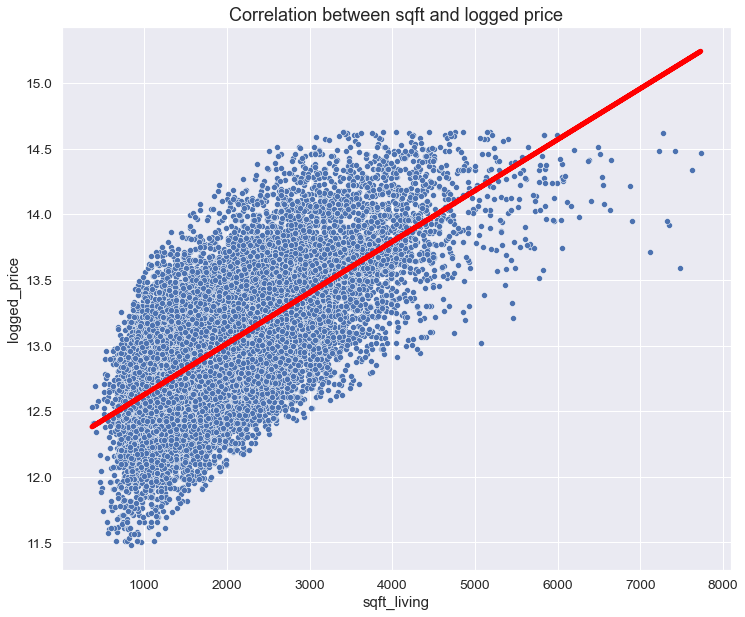

In [66]:
X = originalmodeldfzip_drop3stdlog['sqft_living']
Y = originalmodeldfzip_drop3stdlog['price_log']
calc_slope(X,Y)
m, c = best_fit(X,Y)
regression_line = reg_line(m,c,X)
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=originalmodeldfzip_drop3stdlog['sqft_living'], y=originalmodeldfzip_drop3stdlog['price_log'], ax=ax)
plt.plot(X, regression_line, lw=5, color='red')
ax.set_title('Correlation between sqft and logged price', fontsize=18)
ax.set_ylabel('logged_price', fontsize=15)
ax.set_xlabel('sqft_living', fontsize=15);

In [ ]:
#### 

C:\Users\rober\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


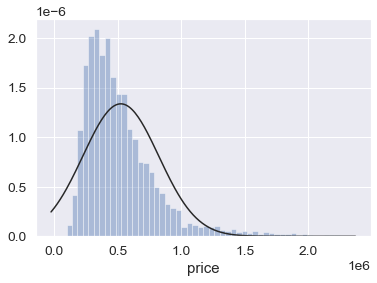

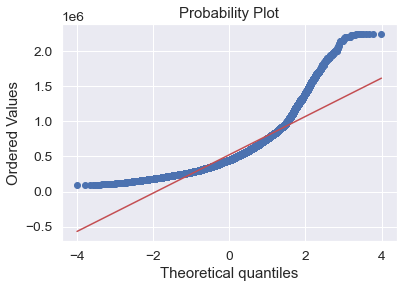

In [69]:
sns.distplot(originalmodeldfzip_drop3stdlog['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(originalmodeldfzip_drop3stdlog['price'], plot=plt)

C:\Users\rober\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


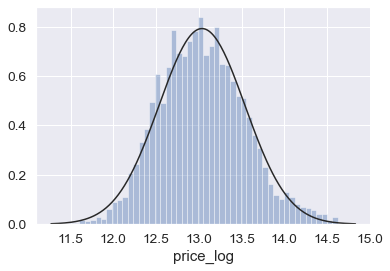

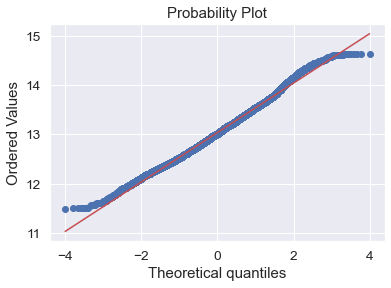

In [71]:
#transformed histogram and normal probability plot
sns.distplot(originalmodeldfzip_drop3stdlog['price_log'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(originalmodeldfzip_drop3stdlog['price_log'], plot=plt)